In [1]:
N = 200
ntrees = 100
sample_size = 160
seed = 42

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import h2o
import math
import random
from h2o.estimators import H2OIsolationForestEstimator, H2OExtendedIsolationForestEstimator
from sklearn.datasets import make_blobs
from datetime import datetime

In [3]:
#conda install -c conda-forge h2o-py openjdk -y

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,33 mins 12 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,"14 days, 1 hour and 40 minutes"
H2O_cluster_name:,H2O_from_python_Dhavan_jf0xed
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.966 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"



On Training Data:
LOF ROC:0.5422, precision @ rank n:0.18
0.836

On Test Data:
LOF ROC:0.5274, precision @ rank n:0.17
0.845
Duration: 0:00:00.118070


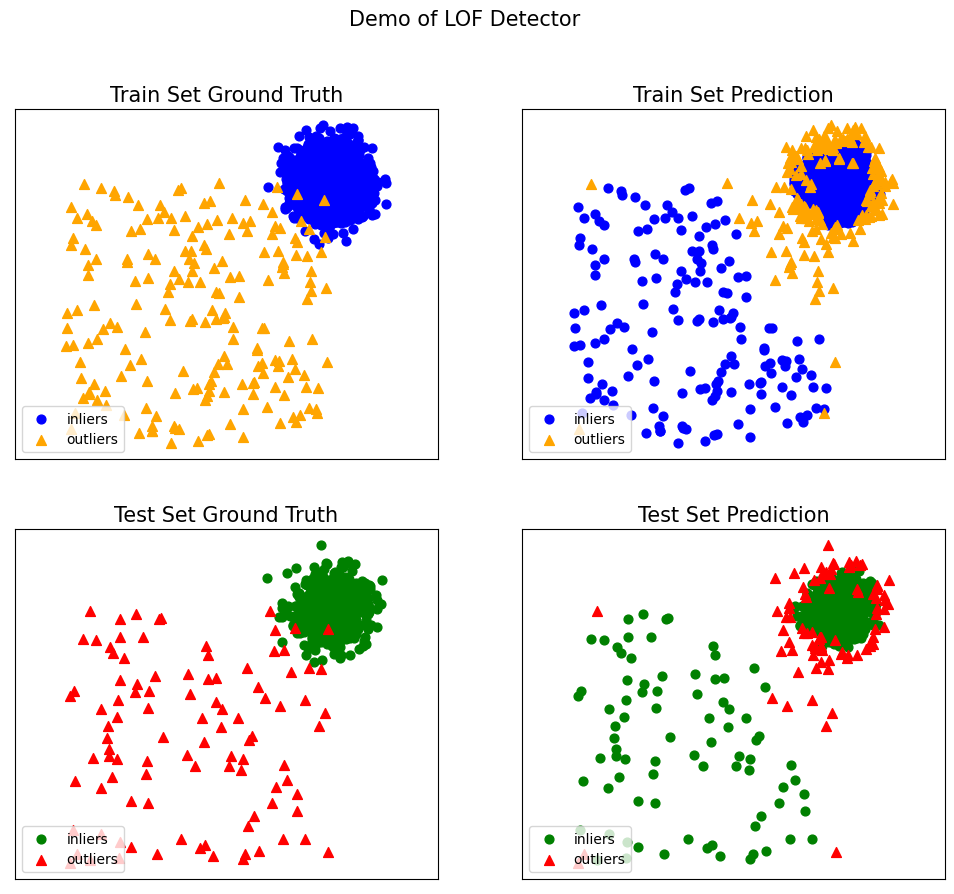

In [4]:

from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.lof import LOF
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from joblib import dump, load

if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers (the number of outliers in train(correct answer)=20)
    n_train = 2000  # number of training points
    n_test = 1000  # number of testing points

    # Generate sample data
    X_train, X_test, y_train, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)
    
    
    start_time = datetime.now()

    # train LOF detector
    clf_name = 'LOF'
    clf = LOF()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    
    # save the model
    dump(clf, 'clf.joblib')
    # load the model
    clf = load('clf.joblib')

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
   
    
   # evaluate and print the results
    clf_name='LOF'
    clf = LOF()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
   
    train_accuracy=np.sum(y_train== y_train_pred )/len(y_train)
    print(train_accuracy)

    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    test_accuracy=np.sum(y_test== y_test_pred )/len(y_test)
    print(test_accuracy)
    # do your work here
    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)
    
    
from joblib import dump, load

# save the model
dump(clf, 'clf.joblib')
# load the model
clf = load('clf.joblib')
 


On Training Data:
KNN ROC:0.9967, precision @ rank n:0.96
0.992

On Test Data:
KNN ROC:0.994, precision @ rank n:0.96
0.992


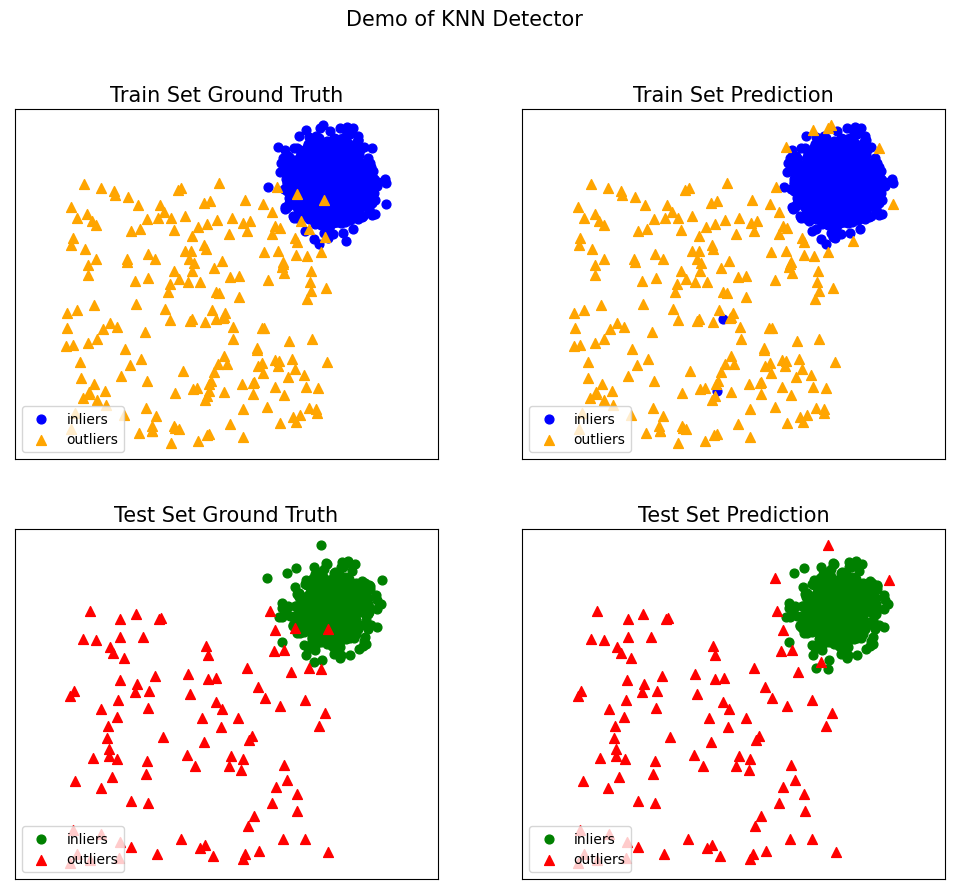

In [5]:


# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.knn import KNN


from joblib import dump, load

if __name__ == "__main__":
    
    # train LOF detector
    clf_name = 'KNN'
    clf = KNN()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    
    # save the model
    dump(clf, 'clf.joblib')
    # load the model
    clf = load('clf.joblib')

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
   
    
   # evaluate and print the results
    clf_name='KNN'
    clf = KNN()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    train_accuracy=np.sum(y_train== y_train_pred )/len(y_train)
    print(train_accuracy)

    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    test_accuracy=np.sum(y_test== y_test_pred )/len(y_test)
    print(test_accuracy)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)
    

from joblib import dump, load

# save the model
dump(clf, 'clf.joblib')
# load the model
clf = load('clf.joblib')
 


On Training Data:
IForest ROC:0.9939, precision @ rank n:0.93
0.986

On Test Data:
IForest ROC:0.9907, precision @ rank n:0.92
0.987


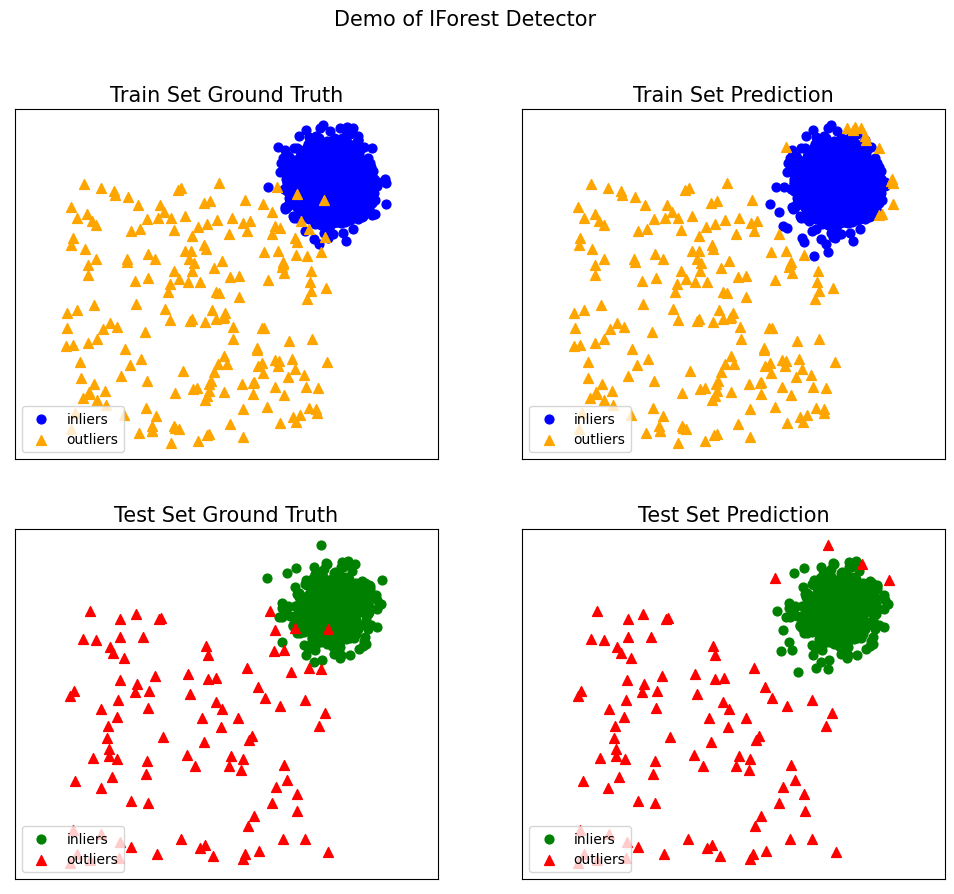

In [6]:


# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.iforest import IForest


from joblib import dump, load

if __name__ == "__main__":
    
    # train LOF detector
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    
    # save the model
    dump(clf, 'clf.joblib')
    # load the model
    clf = load('clf.joblib')

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
   
    
   # evaluate and print the results
    clf_name='IForest'
    clf = IForest()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    train_accuracy=np.sum(y_train== y_train_pred )/len(y_train)
    print(train_accuracy)

    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    test_accuracy=np.sum(y_test== y_test_pred )/len(y_test)
    print(test_accuracy)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)
    

from joblib import dump, load

# save the model
dump(clf, 'clf.joblib')
# load the model
clf = load('clf.joblib')
 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
      x        y
6.43366  5.50917
5.0447   7.70806
5.92454  5.25922
5.29399  5.67126
5.61509  6.13093
6.1859   6.09411
7.16631  7.22719
4.05471  6.48127
5.79978  5.86931
4.82256  7.18593
[2000 rows x 2 columns]

EIF_h2o : No model available
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
y_train : [0. 0. 0. ... 1. 1. 1.]
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%

On Training Data:
EIF ROC:0.9239, precision @ rank n:0.0
# train error 74
0.963

On Test Data:
EIF ROC:0.9456, precision @ rank n:0.0
0.974
Duration: 0:00:56.037593


e:\Python\Anaconda3\envs\IForest\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Python\Anaconda3\envs\IForest\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


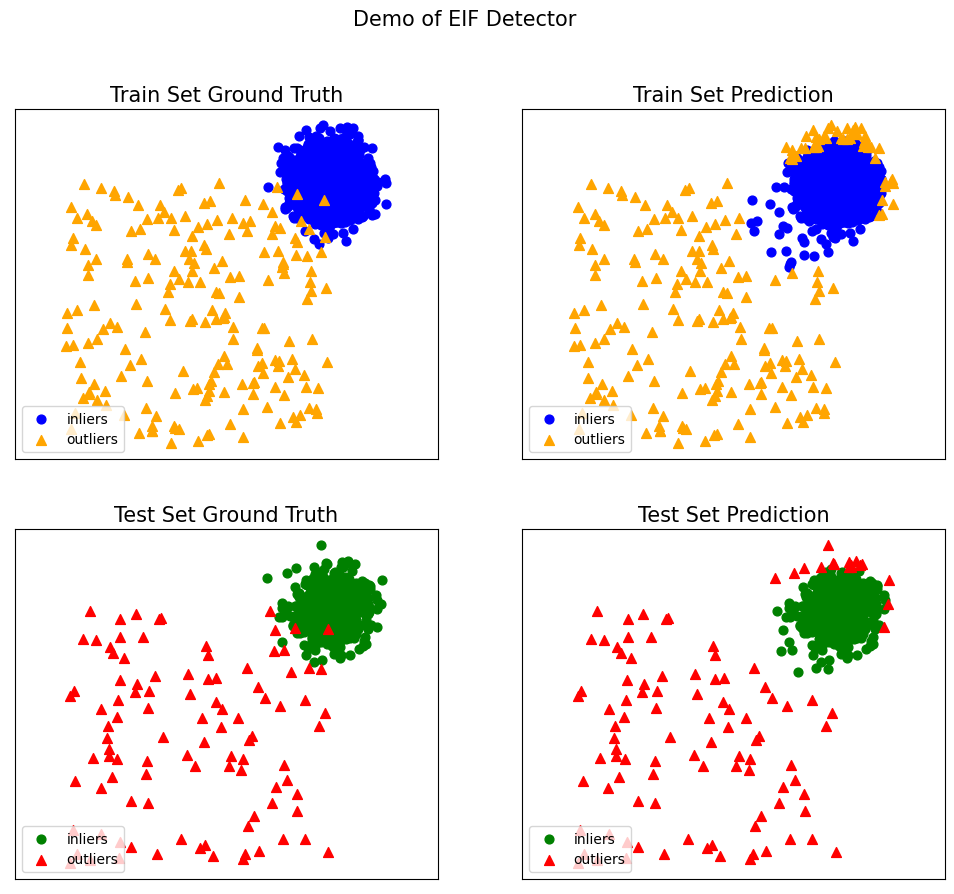

In [7]:
start_time = datetime.now()


data=X_train

training_frame = h2o.H2OFrame(data,column_names = ["x", "y"])
print(training_frame)
EIF_h2o = H2OExtendedIsolationForestEstimator(
                                              model_id = "extended_isolation_forest.hex",
                                              ntrees = ntrees, 
                                              sample_size = sample_size,
                                              extension_level = 1,
                                              seed = seed
                                             )
print("EIF_h2o :",EIF_h2o)

EIF_h2o.train(training_frame = training_frame)


threshold=0.46
print("y_train :",y_train)
y_train_pred2=EIF_h2o.predict(training_frame)['anomaly_score']
y_train_pred2[y_train_pred2>threshold] = 1
y_train_pred2[y_train_pred2<=threshold] = 0

y_train_pred2=np.array(y_train_pred2.as_data_frame(use_pandas=True, header=True)).reshape((2000,))

testing_frame2 = h2o.H2OFrame(X_test,column_names = ["x", "y"])
y_test_pred2=EIF_h2o.predict(testing_frame2)['anomaly_score']
y_test_pred2[y_test_pred2>threshold] = 1
y_test_pred2[y_test_pred2<=threshold] = 0

y_test_pred2=np.array(y_test_pred2.as_data_frame(use_pandas=True, header=True)).reshape((1000,))

# evaluate and print the results
clf_name='EIF'
y_test_scores = clf.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("# train error",np.sum(y_train!= y_train_pred2))
EIF_train_accuracy=np.sum(y_train== y_train_pred2)/len(y_train)
print(EIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

EIF_test_accuracy=np.sum(y_test== y_test_pred2)/len(y_test)
print(EIF_test_accuracy)

# do your work here
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred2,
              y_test_pred2, show_figure=True, save_figure=False)



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
      x        y
6.43366  5.50917
5.0447   7.70806
5.92454  5.25922
5.29399  5.67126
5.61509  6.13093
6.1859   6.09411
7.16631  7.22719
4.05471  6.48127
5.79978  5.86931
4.82256  7.18593
[2000 rows x 2 columns]

EIF_h2o : No model available
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
y_train : [0. 0. 0. ... 1. 1. 1.]
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%

On Training Data:
EIF ROC:0.9192, precision @ rank n:0.0
# train error 59
0.9705

On Test Data:
EIF ROC:0.9233, precision @ rank n:0.8776
0.974
Duration: 0:00:54.930777


e:\Python\Anaconda3\envs\IForest\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


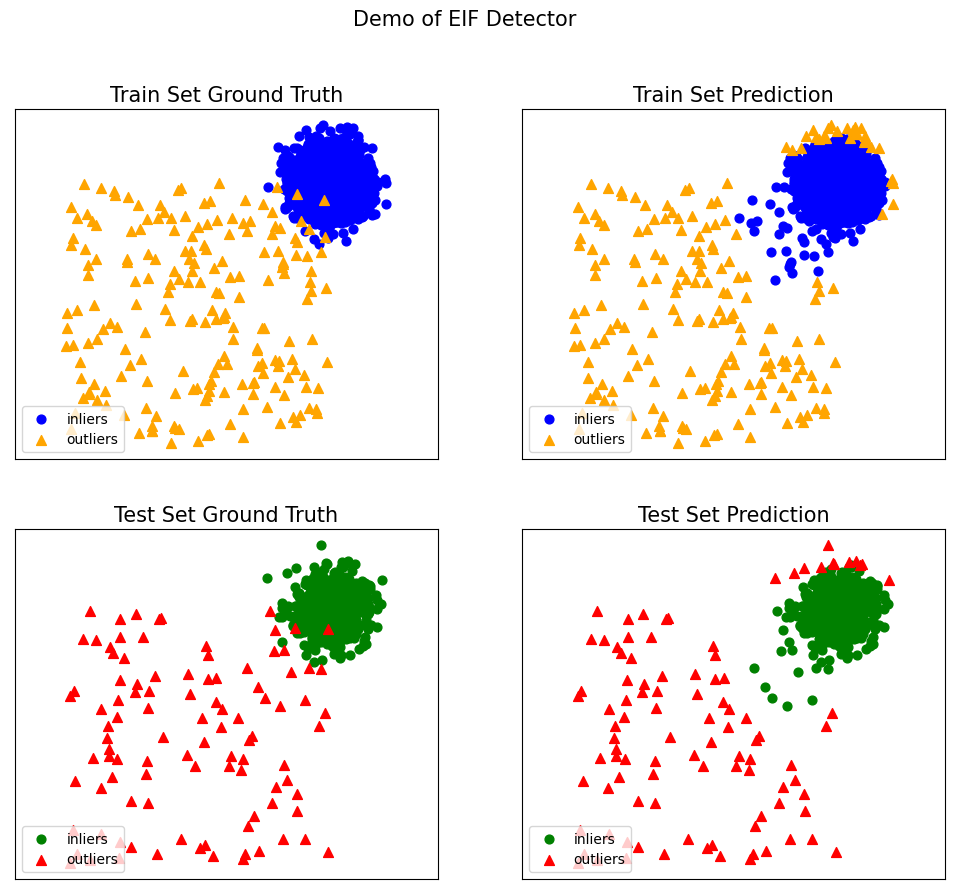

In [8]:
start_time = datetime.now()


data=X_train

training_frame = h2o.H2OFrame(data,column_names = ["x", "y"])
print(training_frame)
EIF_h2o = H2OExtendedIsolationForestEstimator(
                                              model_id = "extended_isolation_forest.hex",
                                              ntrees = ntrees, 
                                              sample_size = sample_size,
                                              extension_level = 1,
                                              seed = seed
                                             )
print("EIF_h2o :",EIF_h2o)

EIF_h2o.train(training_frame = training_frame)

threshold=0.48
print("y_train :",y_train)
y_train_pred2=EIF_h2o.predict(training_frame)['anomaly_score']
y_train_pred2[y_train_pred2>threshold] = 1
y_train_pred2[y_train_pred2<=threshold] = 0

y_train_pred2=np.array(y_train_pred2.as_data_frame(use_pandas=True, header=True)).reshape((2000,))

testing_frame2 = h2o.H2OFrame(X_test,column_names = ["x", "y"])
y_test_pred2=EIF_h2o.predict(testing_frame2)['anomaly_score']
y_test_pred2[y_test_pred2>threshold] = 1
y_test_pred2[y_test_pred2<=threshold] = 0

y_test_pred2=np.array(y_test_pred2.as_data_frame(use_pandas=True, header=True)).reshape((1000,))

# evaluate and print the results
clf_name='EIF'
y_test_scores = clf.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("# train error",np.sum(y_train!= y_train_pred2))
EIF_train_accuracy=np.sum(y_train== y_train_pred2)/len(y_train)
print(EIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

EIF_test_accuracy=np.sum(y_test== y_test_pred2)/len(y_test)
print(EIF_test_accuracy)
# do your work here
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred2,
              y_test_pred2, show_figure=True, save_figure=False)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
      x        y
6.43366  5.50917
5.0447   7.70806
5.92454  5.25922
5.29399  5.67126
5.61509  6.13093
6.1859   6.09411
7.16631  7.22719
4.05471  6.48127
5.79978  5.86931
4.82256  7.18593
[2000 rows x 2 columns]

EIF_h2o : No model available
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
y_train : [0. 0. 0. ... 1. 1. 1.]
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%

On Training Data:
EIF ROC:0.9058, precision @ rank n:0.873
#train error 59
0.9705

On Test Data:
EIF ROC:0.9106, precision @ rank n:0.9121
0.975
Duration: 0:00:54.240955


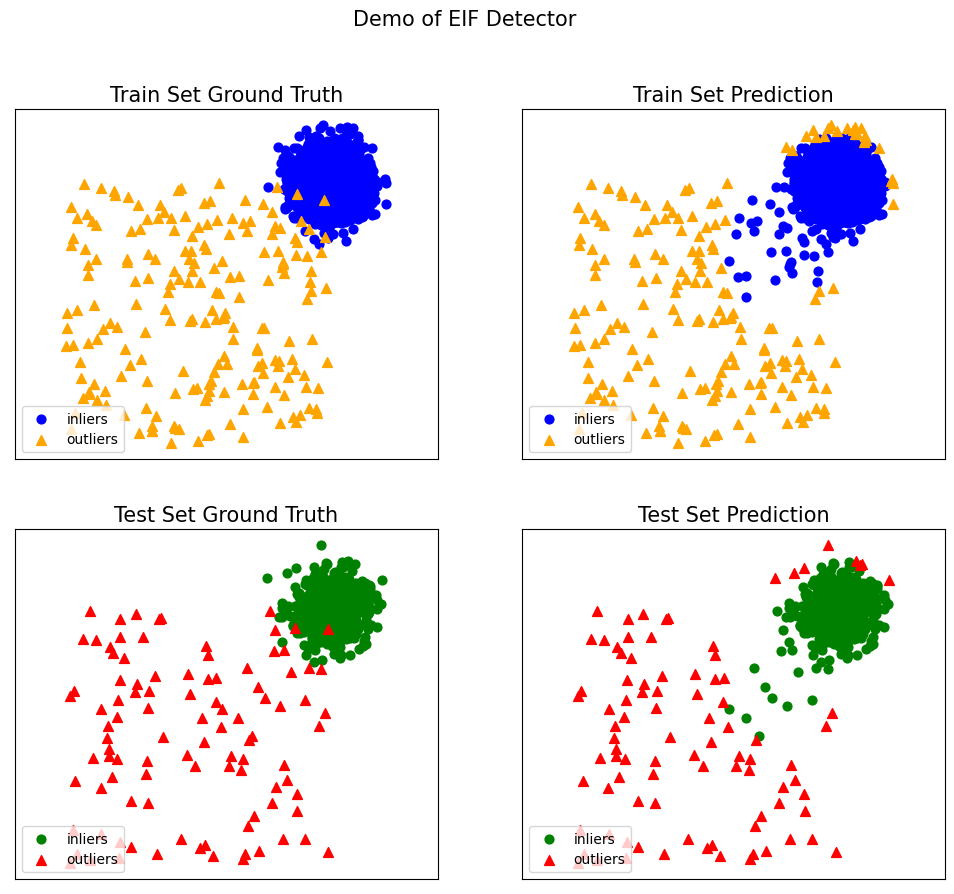

In [9]:
start_time = datetime.now()


data=X_train

training_frame = h2o.H2OFrame(data,column_names = ["x", "y"])
print(training_frame)
EIF_h2o = H2OExtendedIsolationForestEstimator(
                                              model_id = "extended_isolation_forest.hex",
                                              ntrees = ntrees, 
                                              sample_size = sample_size,
                                              extension_level = 1,
                                              seed = seed
                                             )
print("EIF_h2o :",EIF_h2o)

EIF_h2o.train(training_frame = training_frame)


#little bit overfitted

threshold=0.5
print("y_train :",y_train)
y_train_pred2=EIF_h2o.predict(training_frame)['anomaly_score']
y_train_pred2[y_train_pred2>threshold] = 1
y_train_pred2[y_train_pred2<=threshold] = 0

y_train_pred2=np.array(y_train_pred2.as_data_frame(use_pandas=True, header=True)).reshape((2000,))

testing_frame2 = h2o.H2OFrame(X_test,column_names = ["x", "y"])
y_test_pred2=EIF_h2o.predict(testing_frame2)['anomaly_score']
y_test_pred2[y_test_pred2>threshold] = 1
y_test_pred2[y_test_pred2<=threshold] = 0

y_test_pred2=np.array(y_test_pred2.as_data_frame(use_pandas=True, header=True)).reshape((1000,))

# evaluate and print the results
clf_name='EIF'
y_test_scores = clf.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("#train error",np.sum(y_train!= y_train_pred2))
EIF_train_accuracy=np.sum(y_train== y_train_pred2)/len(y_train)
print(EIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

EIF_test_accuracy=np.sum(y_test== y_test_pred2)/len(y_test)
print(EIF_test_accuracy)

# do your work here
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred2,
              y_test_pred2, show_figure=True, save_figure=False)

In [10]:
import pandas as pd
import numpy as np
from difmain.algorithms.dif import DIF

model_configs = {'n_ensemble':50, 'n_estimators':6}

data_tst = np.c_[X_train, y_train]
print(data_tst)

[[ 6.43365854  5.5091683   0.        ]
 [ 5.04469788  7.70806466  0.        ]
 [ 5.92453568  5.25921966  0.        ]
 ...
 [-4.72649297  0.37628198  1.        ]
 [-1.25066784  1.35782293  1.        ]
 [ 3.66722663 -2.40397579  1.        ]]


network additional parameters: {'n_hidden': [500, 100], 'n_emb': 20, 'skip_connection': None, 'dropout': None, 'activation': 'tanh', 'be_size': 50}
y_train : [0. 0. 0. ... 1. 1. 1.]

On Training Data:
DIF ROC:0.9058, precision @ rank n:0.873
# train error 19
0.9905

On Test Data:
DIF ROC:0.9106, precision @ rank n:0.9121
0.989
Duration: 0:00:23.384198


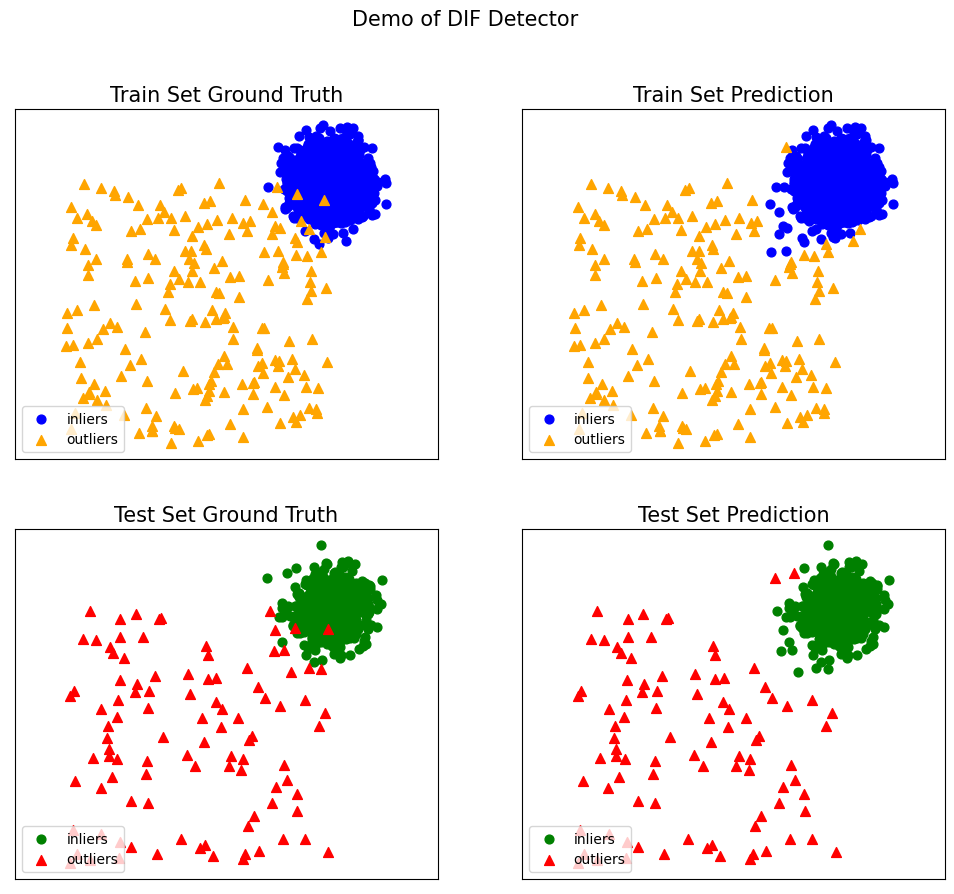

In [11]:
start_time = datetime.now()

dif = DIF(**model_configs)
dif.fit(X_train)


threshold=0.28
print("y_train :",y_train)
y_train_pred3=dif.decision_function(X_train)
y_train_pred3[y_train_pred3>threshold] = 1
y_train_pred3[y_train_pred3<=threshold] = 0

#y_train_pred3=np.array(y_train_pred3.as_data_frame(use_pandas=True, header=True)).reshape((200,))

#testing_frame3 = dif.decision_function(X_test)
y_test_pred3=dif.decision_function(X_test)
y_test_pred3[y_test_pred3>threshold] = 1
y_test_pred3[y_test_pred3<=threshold] = 0

#y_test_pred3=np.array(y_test_pred3.as_data_frame(use_pandas=True, header=True)).reshape((100,))

# evaluate and print the results
clf_name='DIF'
y_test_scores = dif.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("# train error",np.sum(y_train!= y_train_pred3))
DIF_train_accuracy=np.sum(y_train== y_train_pred3)/len(y_train)
print(DIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

DIF_test_accuracy=np.sum(y_test== y_test_pred3)/len(y_test)
print(DIF_test_accuracy)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred3,
              y_test_pred3, show_figure=True, save_figure=False)

network additional parameters: {'n_hidden': [500, 100], 'n_emb': 20, 'skip_connection': None, 'dropout': None, 'activation': 'tanh', 'be_size': 50}
y_train : [0. 0. 0. ... 1. 1. 1.]

On Training Data:
DIF ROC:0.9058, precision @ rank n:0.873
# train error 22
0.989

On Test Data:
DIF ROC:0.9106, precision @ rank n:0.9121
0.989
Duration: 0:00:19.120219


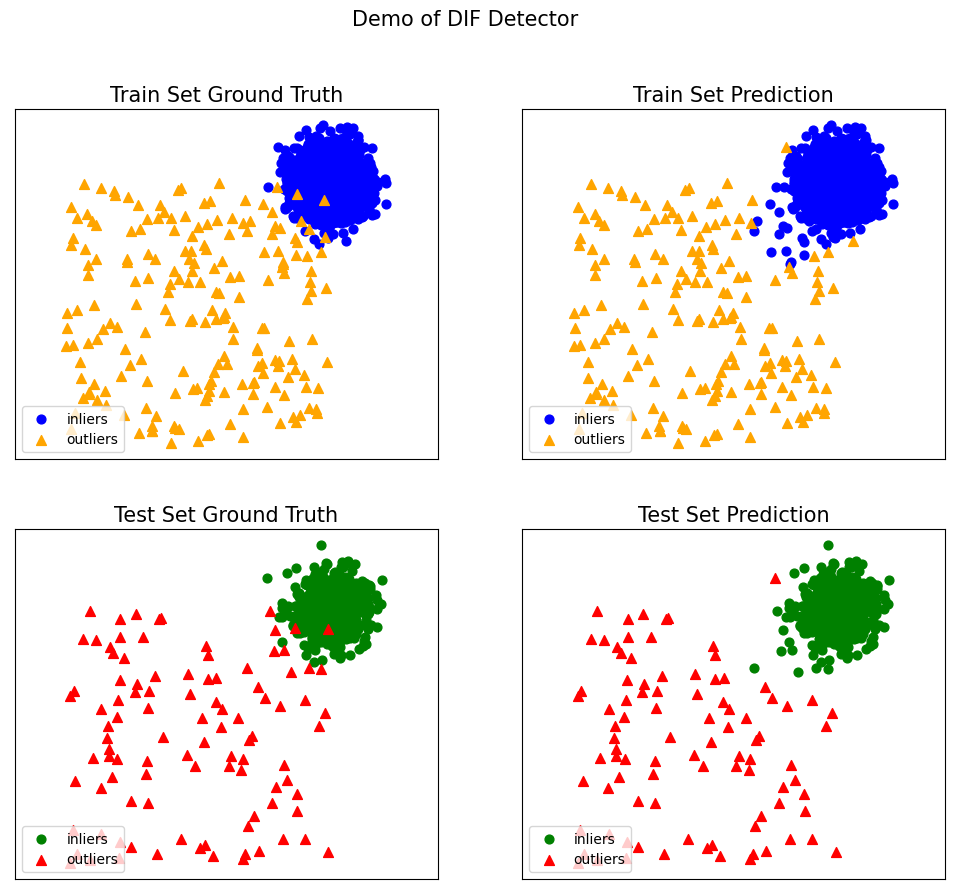

In [12]:
start_time = datetime.now()

dif = DIF(**model_configs)
dif.fit(X_train)


threshold=0.30
print("y_train :",y_train)
y_train_pred3=dif.decision_function(X_train)
y_train_pred3[y_train_pred3>threshold] = 1
y_train_pred3[y_train_pred3<=threshold] = 0

#y_train_pred3=np.array(y_train_pred3.as_data_frame(use_pandas=True, header=True)).reshape((200,))

#testing_frame3 = dif.decision_function(X_test)
y_test_pred3=dif.decision_function(X_test)
y_test_pred3[y_test_pred3>threshold] = 1
y_test_pred3[y_test_pred3<=threshold] = 0

#y_test_pred3=np.array(y_test_pred3.as_data_frame(use_pandas=True, header=True)).reshape((100,))

# evaluate and print the results
clf_name='DIF'
y_test_scores = dif.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("# train error",np.sum(y_train!= y_train_pred3))
DIF_train_accuracy=np.sum(y_train== y_train_pred3)/len(y_train)
print(DIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

DIF_test_accuracy=np.sum(y_test== y_test_pred3)/len(y_test)
print(DIF_test_accuracy)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred3,
              y_test_pred3, show_figure=True, save_figure=False)

network additional parameters: {'n_hidden': [500, 100], 'n_emb': 20, 'skip_connection': None, 'dropout': None, 'activation': 'tanh', 'be_size': 50}
y_train : [0. 0. 0. ... 1. 1. 1.]

On Training Data:
DIF ROC:0.9058, precision @ rank n:0.873
# train error 24
0.988

On Test Data:
DIF ROC:0.9106, precision @ rank n:0.9121
0.988
Duration: 0:00:16.949882


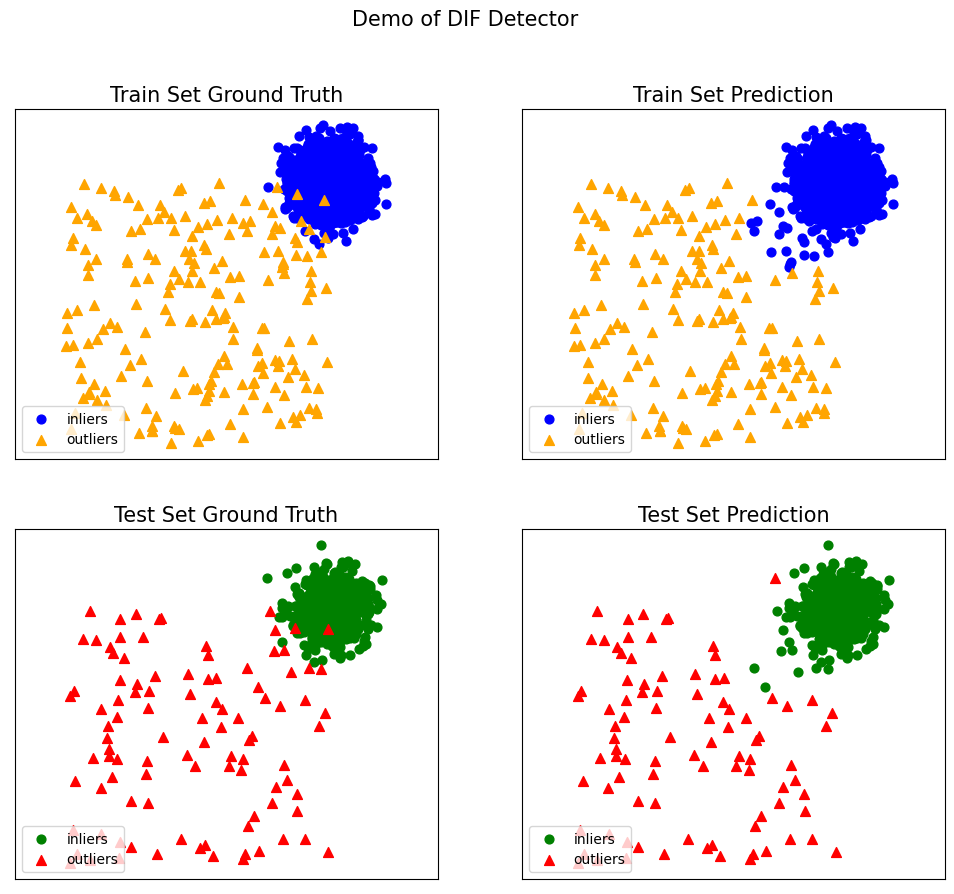

In [13]:
start_time = datetime.now()

dif = DIF(**model_configs)
dif.fit(X_train)


threshold=0.32
print("y_train :",y_train)
y_train_pred3=dif.decision_function(X_train)
y_train_pred3[y_train_pred3>threshold] = 1
y_train_pred3[y_train_pred3<=threshold] = 0

#y_train_pred3=np.array(y_train_pred3.as_data_frame(use_pandas=True, header=True)).reshape((200,))

#testing_frame3 = dif.decision_function(X_test)
y_test_pred3=dif.decision_function(X_test)
y_test_pred3[y_test_pred3>threshold] = 1
y_test_pred3[y_test_pred3<=threshold] = 0

#y_test_pred3=np.array(y_test_pred3.as_data_frame(use_pandas=True, header=True)).reshape((100,))

# evaluate and print the results
clf_name='DIF'
y_test_scores = dif.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("# train error",np.sum(y_train!= y_train_pred3))
DIF_train_accuracy=np.sum(y_train== y_train_pred3)/len(y_train)
print(DIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

DIF_test_accuracy=np.sum(y_test== y_test_pred3)/len(y_test)
print(DIF_test_accuracy)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred3,
              y_test_pred3, show_figure=True, save_figure=False)